# Jamboree Education

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

# Problem
Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from scipy import stats

import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Jamboree_Admission.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


- Serial No. (Unique row ID)
- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (either 0 or 1)
- Chance of Admit (ranging from 0 to 1) 

In [4]:
data.shape

(500, 9)

In [5]:
data["Serial No."].nunique()

500

- Data does not contain any null values
- Serial number column is unique to the individual student and hence can be dropped

In [6]:
data.drop(columns = "Serial No.", inplace = True)

In [7]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
data.columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit']

In [9]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## Univarient analysis

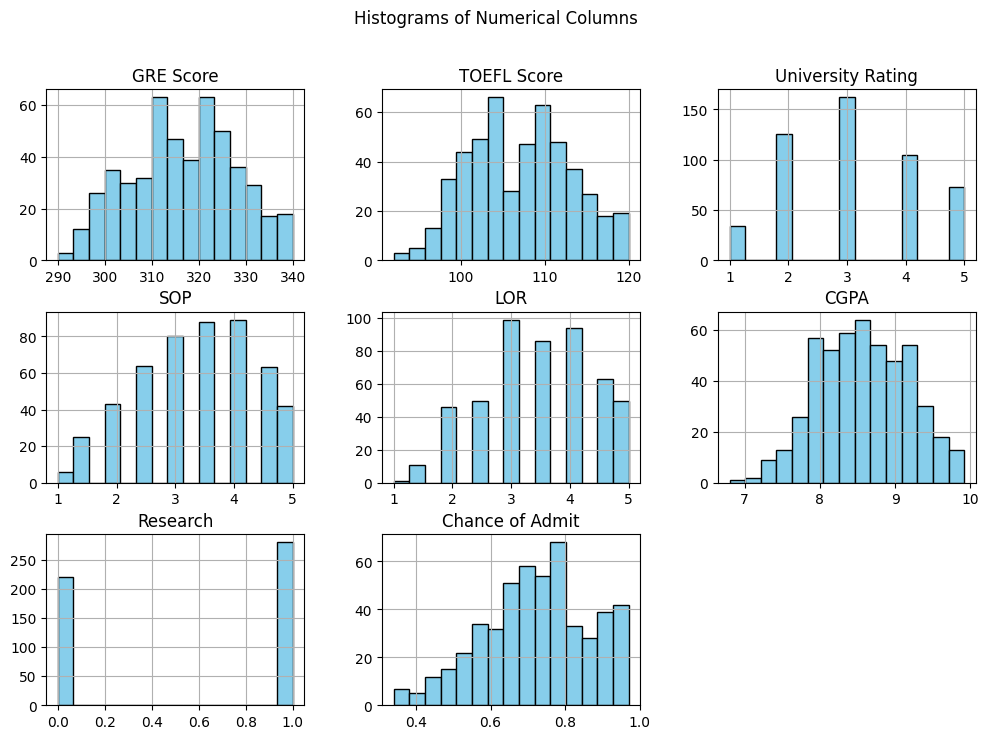

In [10]:
data.hist(bins=15, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Columns')
plt.show()

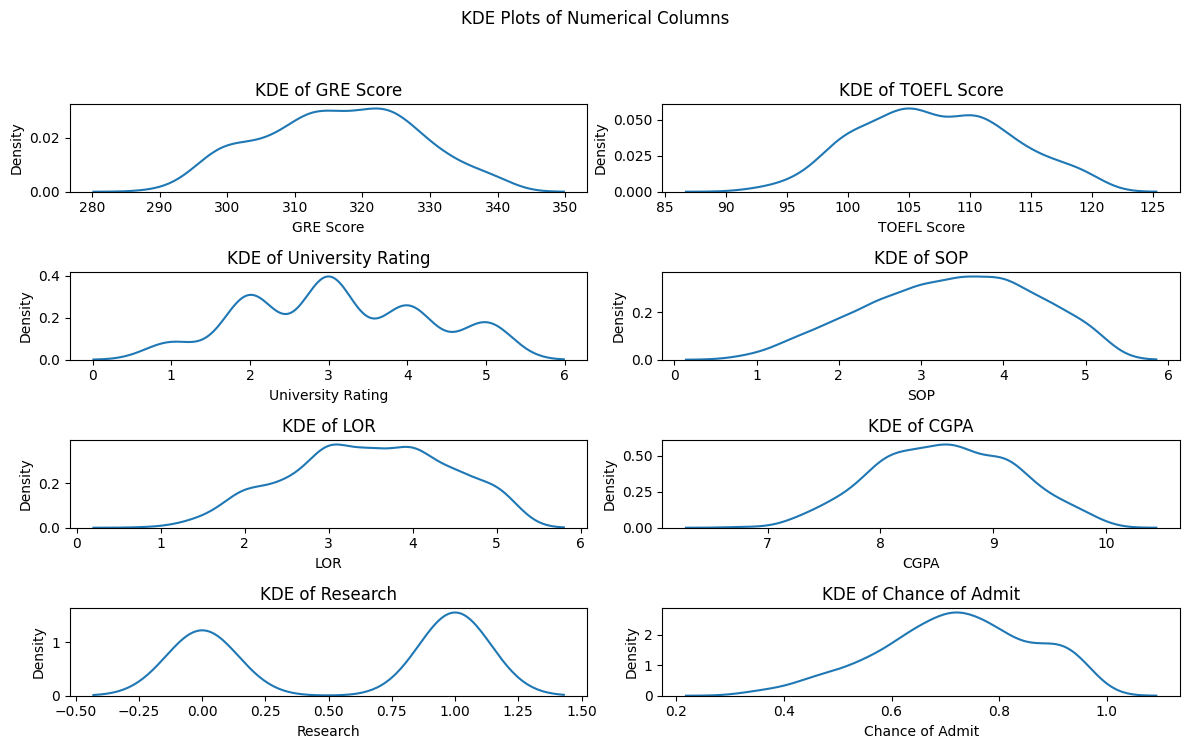

In [11]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns):
    plt.subplot(4, 2, i + 1)
    sns.kdeplot(data[column])
    plt.title(f'KDE of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
plt.suptitle('KDE Plots of Numerical Columns')
plt.tight_layout(rect=[0, 0.05, 1, 0.95]) 
plt.show()

In [12]:
skewness = data.skew()
print(f"Skewness:\n{skewness}\n")

Skewness:
GRE Score           -0.039842
TOEFL Score          0.095601
University Rating    0.090295
SOP                 -0.228972
LOR                 -0.145290
CGPA                -0.026613
Research            -0.242475
Chance of Admit     -0.289966
dtype: float64



In [13]:
kurtosis = data.kurt()
print(f"Kurtosis:\n{kurtosis}\n")

Kurtosis:
GRE Score           -0.711064
TOEFL Score         -0.653245
University Rating   -0.810080
SOP                 -0.705717
LOR                 -0.745749
CGPA                -0.561278
Research            -1.949018
Chance of Admit     -0.454682
dtype: float64



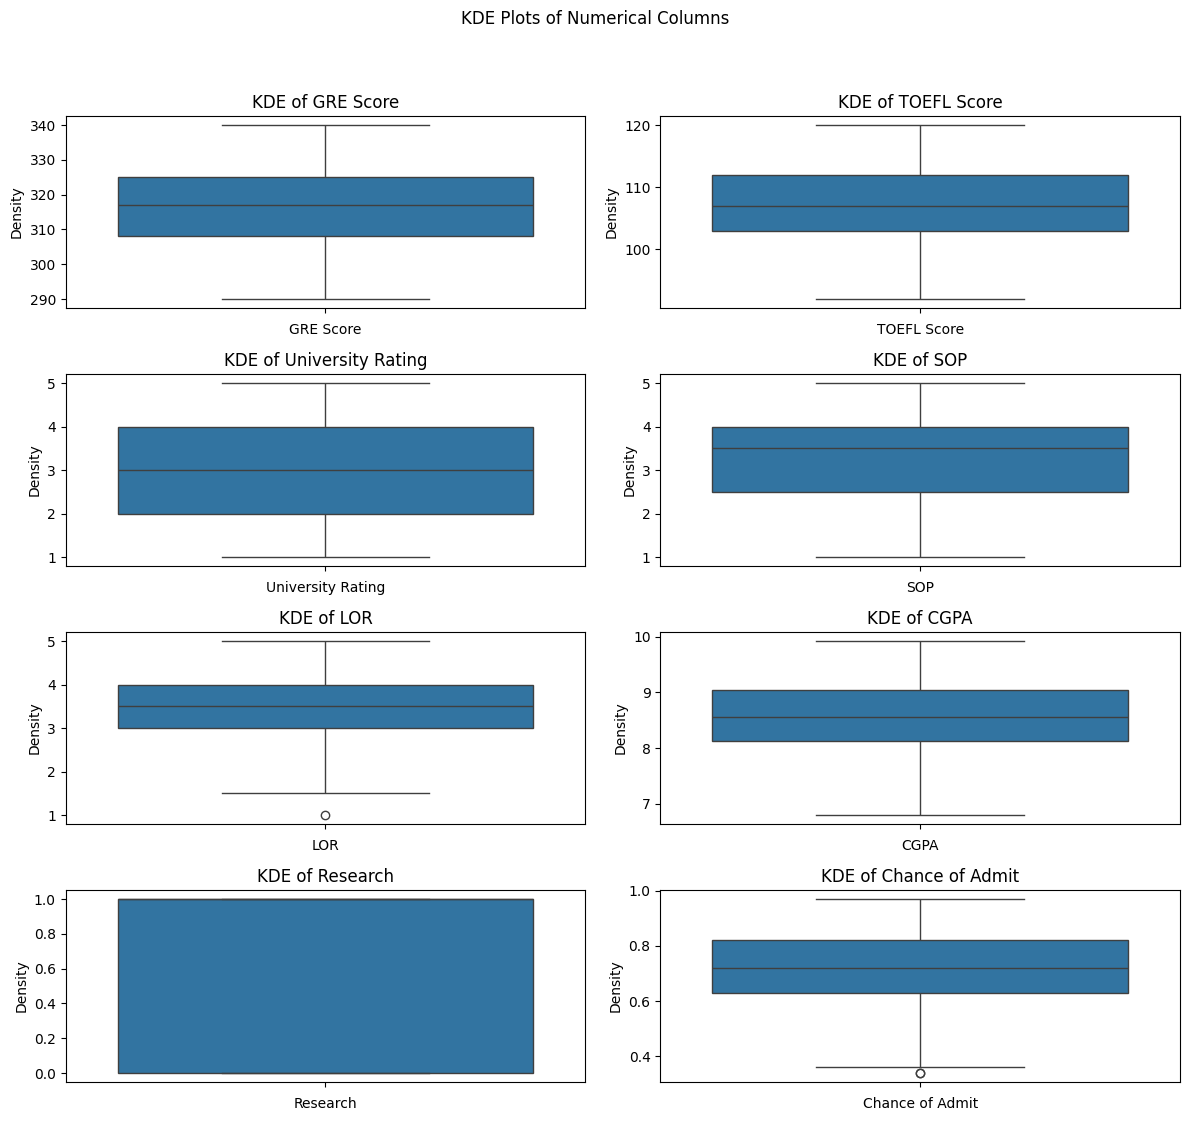

In [14]:
plt.figure(figsize=(12, 12))
for i, column in enumerate(data.columns):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(data[column])
    plt.title(f'KDE of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
plt.suptitle('KDE Plots of Numerical Columns')
plt.tight_layout(rect=[0, 0.05, 1, 0.95]) 
plt.show()

**Observations**
- All the destributions have light tailedness
- GRE score is ranging from 290 to 340, when we observe the destribution, looks symetric with little left skew
- TOEFL Score is ranging from 92 to 120, when we observe the destribution, looks symetric with little Right
- University Rating is ranging from 1 to 5 and median is 3
- LOR, SOP is in range of 1 to 5 with median 3.5 with little left skew
- CGPA is in range of 6.8 and 9.9 with little left skew
- No outlines in the data

## Bi varient analysis

In [15]:
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<Axes: >

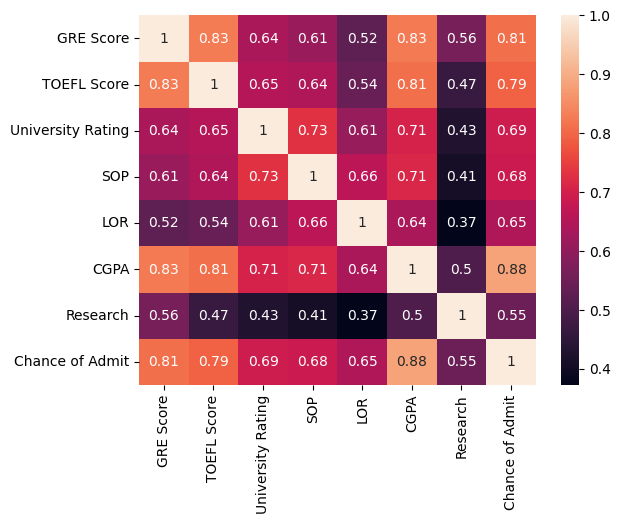

In [16]:
sns.heatmap(data.corr(), annot = True)

**Observations**
- GRE score, TOEFL Score and CGPA are highly correlated with each other
- Validate the VIF to see if these correlation effect the model

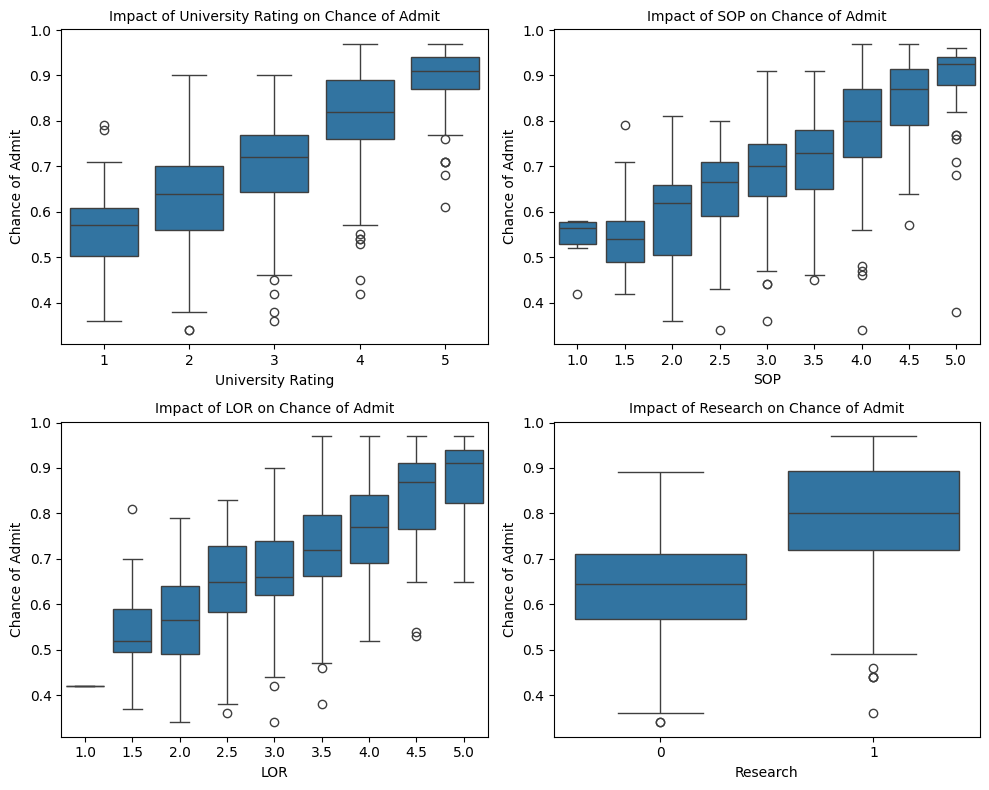

In [17]:
plt.figure(figsize=(10,8))
cols = ["University Rating", "SOP", "LOR", "Research"]
i=1
for col in cols:
    ax = plt.subplot(2,2,i)
    sns.boxplot(data = data, x=col, y='Chance of Admit')
    plt.title(f"Impact of {col} on Chance of Admit", fontsize=10)
    plt.xlabel(col)
    plt.ylabel('Chance of Admit')
    i+=1

plt.tight_layout()
plt.show();

**Observations**

- Higher the LOR or SOP streangth, higher the chance of getting the Admission
- Student with more research experience has higher probability of getting the admissoin
- Higher the University rating higher the change of getting the admit

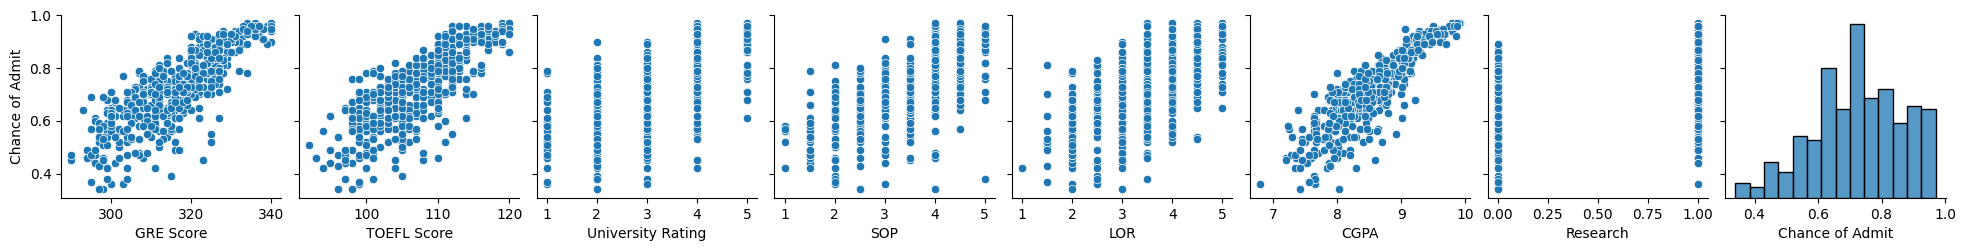

In [18]:
sns.pairplot(data, y_vars=["Chance of Admit"]);

**Observations**
- GRE Score, TOEL Score and CGPA have linaer relation with the dependent variable Change of Admit. Hence we can apply Linear Regression
- We need take of correlation as LR assums that independent vairables do not have multicollinearity need to test this
- **Linearity of variables test: Independent variables are linear with Target variable**

## Pre processing for ML

In [19]:
X = data.drop(columns = "Chance of Admit")
y = data["Chance of Admit"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=100)

In [21]:
X_train.shape, X_test.shape

((400, 7), (100, 7))

In [22]:
y_train.shape, y_test.shape

((400,), (100,))

In [23]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
205,295,99,2,2.5,3.0,7.65,0
404,311,101,3,2.0,2.5,7.64,1
337,332,118,5,5.0,5.0,9.47,1
440,305,104,2,2.5,1.5,7.79,0
55,320,103,3,3.0,3.0,7.70,0


- As the data is in different Scale and all are numberiacal need to apply Standardization on it

## Standardization 

In [24]:
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

In [25]:
pickle_file_standardisation = './Artifacts/StandardScaler.pkl'
with open(pickle_file_standardisation, 'wb') as file:
    pickle.dump(scaler, file)

In [26]:
X_sm = sm.add_constant(X_tr_scaled)  #Statmodels default is without intercept, to add intercept we need to add constant
sm_model = sm.OLS(y_train, X_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     250.3
Date:                Sun, 01 Sep 2024   Prob (F-statistic):          2.27e-140
Time:                        23:43:25   Log-Likelihood:                 556.28
No. Observations:                 400   AIC:                            -1097.
Df Residuals:                     392   BIC:                            -1065.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7160      0.003    235.381      0.0

**Observations**
- R-squared of 0.817 suggests that the model explains 81.7% of the variance in the dependent variable.
- F-statistic of 250.3 suggests that the model is highly statistically significant. It means that the independent variables in the model collectively explain a substantial amount of the variation in the dependent variable
- Prob (F-statistic) of 2.27e-140 this confirms that the overall model is statistically significant at any conventional significance level (e.g., 0.05 or even 0.01)
- Skew of -1.139 suggests that the residuals are negatively skewed, meaning that the left tail (smaller values)
- Prob(JB): 2.51e-44 suggest that the null hypothesis of normally distributed residuals can be rejected. This suggests that the residuals are not normally distributed
- Cond. No. of  5.86 is relatively low, indicating that multicollinearity is not a concern in your model. Generally, condition numbers above 30 might suggest multicollinearity, so this value is within a safe range.
- The coefficient for x3 is 0.0057, indicating a small positive effect. However, the p-value of 0.245 is much higher than 0.05, meaning x3 is not statistically significant. The confidence interval includes zero, further suggesting that x3 might not have a meaningful impact on the dependent variable.
- The coefficient for x4 is -0.0010, suggesting a very small negative relationship. However, the high p-value of 0.845 indicates that x4 is not statistically significant, and the effect is likely not meaningful. The confidence interval also includes zero, further supporting this conclusion.
- University Rating and SOP are not that segnificant for model

**With above stastical summary we can proceed building Regression model as the features are stastically significat except SOP and University Rating, but log condition No of 5.6 suggest that there is no multicollinarity exists. We can build the model with all the avaliable featus and create another one by removing the SOP and University rating and then compare if the model performance is increasing by this**

## Creating Linear Regression model

In [27]:
model = LinearRegression()
model.fit(X_tr_scaled, y_train)

LinearRegression()

In [28]:
model.coef_

array([ 0.01743666,  0.01888285,  0.00567039, -0.00098766,  0.01763284,
        0.07334481,  0.01334995])

In [29]:
model.intercept_

0.716

In [30]:
model_weights = list (zip(X_train.columns, model.coef_))

In [31]:
df = pd.DataFrame(model_weights, columns = ["Features", "weights"])
df

,Features,weights
0,GRE Score,0.017437
1,TOEFL Score,0.018883
2,University Rating,0.005670
3,SOP,-0.000988
4,LOR,0.017633
5,CGPA,0.073345
6,Research,0.013350


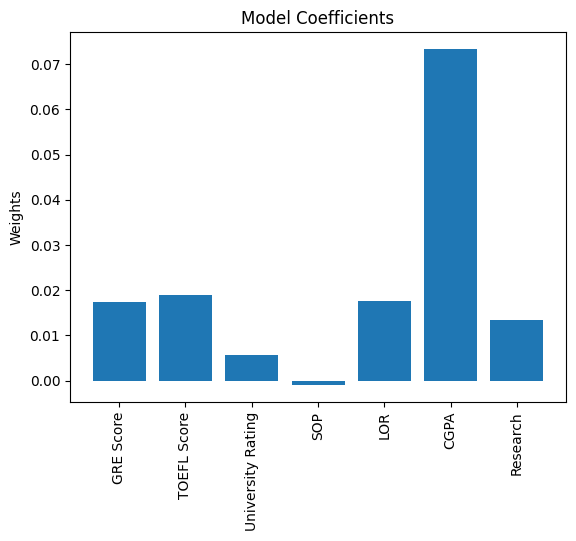

In [32]:
plt.bar(x=df["Features"], height=df["weights"])
plt.title('Model Coefficients')
plt.ylabel('Weights')
plt.xticks(rotation=90)
plt.show();

In [33]:
X_test_scaled = scaler.transform(X_test)

In [34]:
y_pred_train = model.predict(X_tr_scaled)
y_pred_test = model.predict(X_test_scaled)

In [35]:
def evaluate_model(y_true, y_pred):
    n = len(y_true)
    d = 7
    MAE = np.round(mean_absolute_error(y_true=y_true, y_pred=y_pred),2)
    RMSE = np.round(mean_squared_error(y_true=y_true,y_pred=y_pred, squared=False),2)
    r2 = np.round(r2_score(y_true=y_true, y_pred=y_pred),2)
    adj_r2 = np.round(1 - ((1-r2)*(n-1)/(n-d-1)),2)
    MAPE = np.round((np.mean(np.abs((y_true - y_pred) / y_true)) * 100), 2)
    return print(f"MAE: {MAE}\nRMSE: {RMSE}\nR2 Score: {r2}\nAdjusted R2: {adj_r2}\nMAPE : {MAPE}")

In [36]:
print("Training evaluation")
evaluate_model(y_train, y_pred_train)

Training evaluation
MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.82
MAPE : 6.99


In [37]:
print("Testing evaluation")
evaluate_model(y_test, y_pred_test)

Testing evaluation
MAE: 0.04
RMSE: 0.06
R2 Score: 0.83
Adjusted R2: 0.82
MAPE : 6.67


**Model performance on train and test data are almost same, so we can think of this as best generalized model, but let's try and see if the performance will increase with regularisation**

In [38]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_tr_scaled, y_train)
y_pred_test = ridge_reg.predict(X_test_scaled)

In [39]:
print("Testing evaluation")
evaluate_model(y_test, y_pred_test)

Testing evaluation
MAE: 0.04
RMSE: 0.06
R2 Score: 0.83
Adjusted R2: 0.82
MAPE : 6.66


In [40]:
from sklearn.linear_model import RidgeCV
ridge_reg_cv = RidgeCV(alphas=[0.1, 1.0, 10.0], store_cv_values=True)
ridge_reg_cv.fit(X_tr_scaled, y_train)
best_alpha = ridge_reg_cv.alpha_
print(f"Best alpha (lambda) value: {best_alpha}")
y_pred_test = ridge_reg_cv.predict(X_test_scaled)
print("Testing evaluation")
evaluate_model(y_test, y_pred_test)

Best alpha (lambda) value: 1.0
Testing evaluation
MAE: 0.04
RMSE: 0.06
R2 Score: 0.83
Adjusted R2: 0.82
MAPE : 6.66


**Performance is same even with addition of Regularization we can go with normal model the we have built earlier**

In [41]:
model = LinearRegression()
model.fit(X_tr_scaled, y_train)

LinearRegression()

In [42]:
y_pred_train = model.predict(X_tr_scaled)
y_pred_test = model.predict(X_test_scaled)

In [43]:
print("Training evaluation")
evaluate_model(y_train, y_pred_train)

Training evaluation
MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.82
MAPE : 6.99


In [44]:
print("Testing evaluation")
evaluate_model(y_test, y_pred_test)

Testing evaluation
MAE: 0.04
RMSE: 0.06
R2 Score: 0.83
Adjusted R2: 0.82
MAPE : 6.67


In [45]:
pickle_file_standardisation = './Artifacts/LinearRegressionmodel.pkl'
with open(pickle_file_standardisation, 'wb') as file:
    pickle.dump(model, file)

- Mean Absolute Error of 0.04 shows that on an average, the absolute difference between the actual and predicted values of chance of admit is 4%
- Root Mean Square Error of 0.06 means that on an average, the root of squared difference between the actual and predicted values is 6%
- R2 Score of 0.82 means that our model captures 82% variance in the data
- Adjusted R2 is an extension of R2 which shows how the number of features used changes the accuracy of the prediction

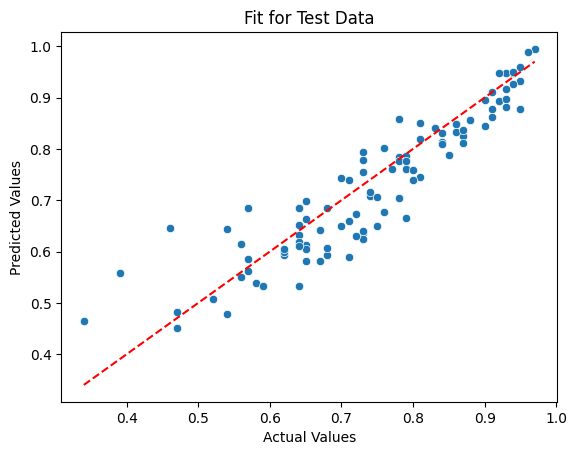

In [46]:
sns.scatterplot(x = y_test, y = y_pred_test)
plt.plot([min(y_test),max(y_test)], [min(y_test),max(y_test)], 'r--')
plt.xlabel("Actual Values")
plt.ylabel('Predicted Values')
plt.title("Fit for Test Data")
plt.show()

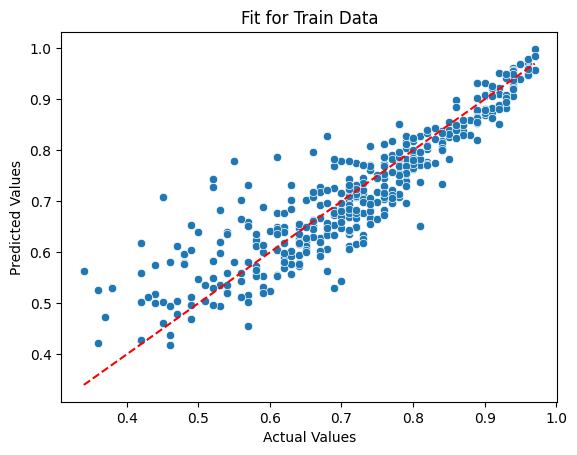

In [47]:
sns.scatterplot(x = y_train, y = y_pred_train)
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 'r--')
plt.xlabel("Actual Values")
plt.ylabel('Predicted Values')
plt.title("Fit for Train Data")
plt.show()

- For lower values of actuals model is performing not that good enough but higher the value of acutal more accurate the prediction will be
- Earlier we have seen some outliers for change of admit this might be real case that student really got admission even with less CGPA, GRE score but research erperience pay an important role as well or with high GRE TOFEL or CGPA but university rating is lower and SOP strenght is less

In [48]:
data[data["Chance of Admit"] <=0.5]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45
27,298,98,2,1.5,2.5,7.50,1,0.44
28,295,93,1,2.0,2.0,7.20,0,0.46
39,307,108,2,4.0,3.5,7.70,0,0.48
40,308,110,3,3.5,3.0,8.00,1,0.46
41,316,105,2,2.5,2.5,8.20,1,0.49
57,298,99,2,4.0,2.0,7.60,0,0.46
58,300,99,1,3.0,2.0,6.80,1,0.36
59,311,104,2,2.0,2.0,8.30,0,0.42


## Assiumptions of Linear Regrrssion

### VIF validation test for Multi collinearity

In [49]:
vif = pd.DataFrame()
X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,CGPA,4.81
0,GRE Score,4.77
1,TOEFL Score,3.89
3,SOP,2.77
2,University Rating,2.56
4,LOR,2.02
6,Research,1.50


- VIF < 5: Generally, this indicates that multicollinearity is not a concern. The feature does not have excessive collinearity with other features.

### Normality of the residuals

In [50]:
residuals = y_test - y_pred_test
print('Mean of Residuals: ', residuals.mean())

Mean of Residuals:  0.014724738335379723


Since the mean of residuals is very close to 0, we can say that the model is unbiased

The mean of residuals is useful to assess the overall bias in the regression model. If the mean of residuals is close to zero, it indicates that the model is unbiased on average.

Text(0.5, 1.0, 'Histogram of residuals')

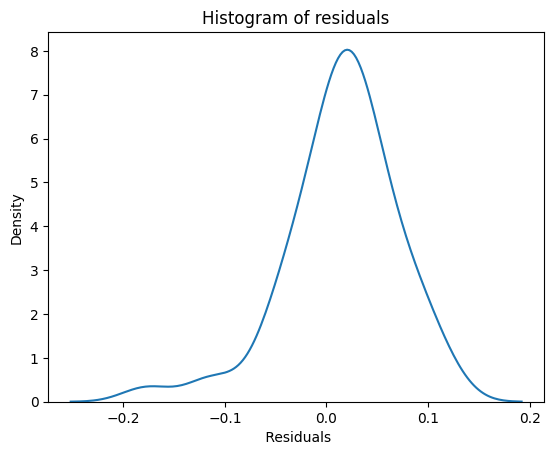

In [51]:
import seaborn as sns
sns.kdeplot(residuals)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

- Resuduals have long left tail and skewed towards left
- Check Q-Q plot or shapiro test to check the normality

In [52]:
res = stats.shapiro(residuals)
res

ShapiroResult(statistic=0.9506736397743225, pvalue=0.000919067591894418)

p_vale is less than alpha, we reject the null hypothesis that residuals are not normally destributed

### Heteroskedasticity should not exist

Text(0.5, 1.0, 'Predicted values vs Residuals')

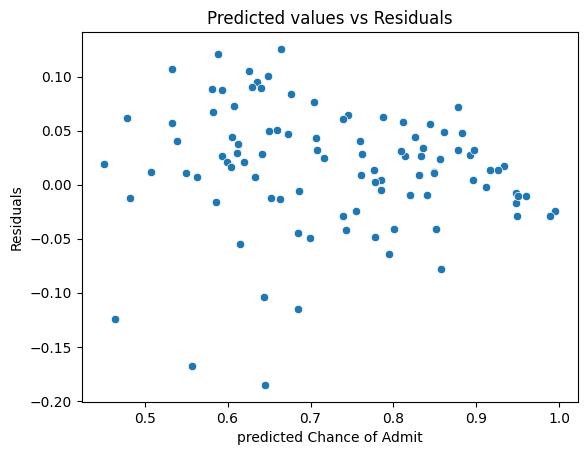

In [53]:
sns.scatterplot(x=y_pred_test,y=residuals)
plt.xlabel("predicted Chance of Admit")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

- From the above it looks like Heteroskedasticity exist
- Use Goldfeld Quandt Test to check homoskedacity

In [54]:
# Performing the Goldfeld-Quandt test to check for Homoscedasticity -
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X_sm)
lzip(name, test)

[('F statistic', 1.0595249743663293), ('p-value', 0.344561956362699)]

- p-value of 0.34 indicates that this difference is statistically significant at conventional levels of significance (e.g., 0.05).
- Therefore, we accept the null hypothesis of homoscedasticity, and conclude that there is no strong evidence of heteroscedasticity in the data.

In [55]:
X_test_scaled.shape

(100, 7)

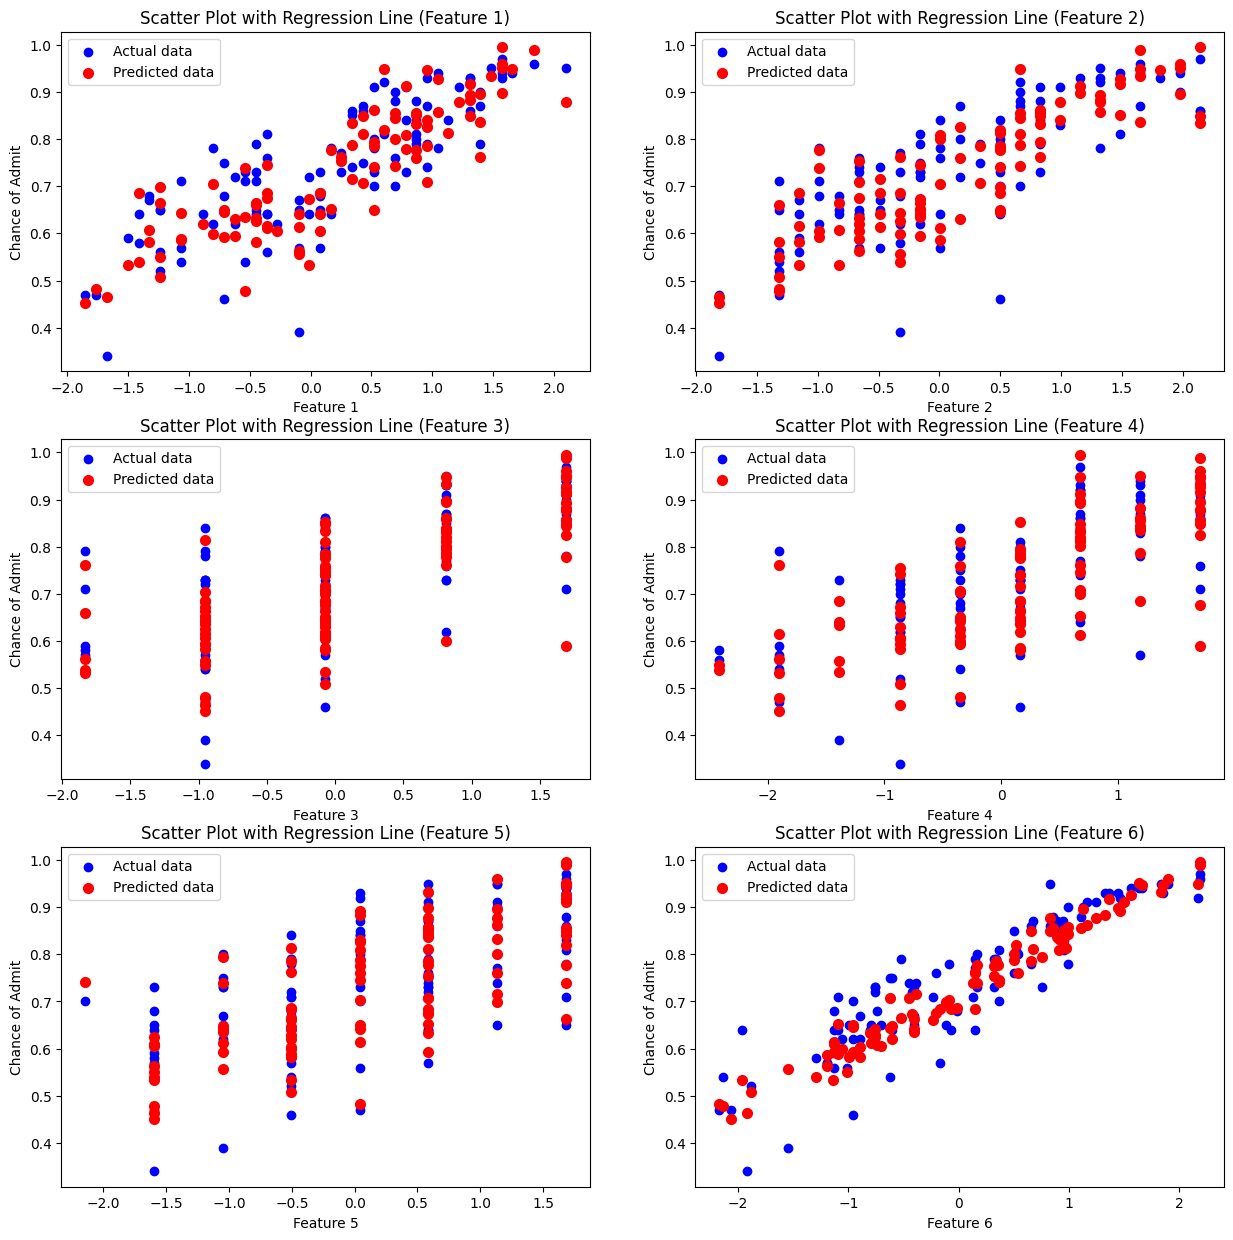

In [56]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()
for feature_index in range(6):
    ax = axes[feature_index]
    X_test_feature = X_test_scaled[:, feature_index]
    ax.scatter(X_test_feature, y_test, color='blue', label='Actual data')
    ax.scatter(X_test_feature, y_pred_test, color='red', linewidth=2, label='Predicted data')
    ax.set_xlabel(f'Feature {feature_index + 1}')
    ax.set_ylabel('Chance of Admit')
    ax.set_title(f'Scatter Plot with Regression Line (Feature {feature_index + 1})')
    ax.legend()


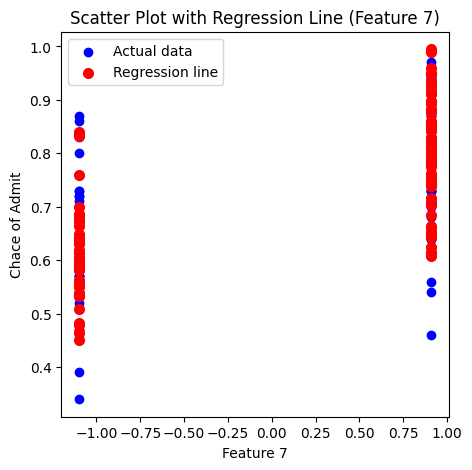

In [57]:
feature_index = 6
X_test_feature = X_test_scaled[:, feature_index]
plt.figure(figsize=(5, 5))
plt.scatter(X_test_feature, y_test, color='blue', label='Actual data')
plt.scatter(X_test_feature, y_pred_test, color='red', linewidth=2, label='Regression line')
plt.xlabel(f'Feature {feature_index + 1}')
plt.ylabel('Chace of Admit')
plt.title(f'Scatter Plot with Regression Line (Feature {feature_index + 1})')
plt.legend()

- For individual features the prediction and true values looks very close, model is gengeralizing well

#### Chance of admit  = 0.017xGRE Score + 0.018xTOEFL Score + 0.005xUniversity Rating -0.00009xSOP + 0.017xLOR + 0.07xCGPA + 0.013xResearch + 0.716

# Insights & Recommendations

**Insights**
- The distribution of target variable (chances of admit) is left-skewed
- Almost all the featues destribution has left skewness
- Exam scores (CGPA/GRE/TOEFL) have a strong positive correlation between them.
- CGPA/GRE/TOEFL are highly correlated with Chance of admit
- the categorical variables such as university ranking, research, quality of SOP and LOR also show an upward trend for chances of admit.
- From the model coefficients (weights), we can conclude that CGPA is the most significant predictor variable while SOP/University Rating are the least significant
- Both Linear Regression and Ridge Regression models, which are our best models, have captured upto 82% of the variance in the target variable (chance of admit). Due to high colinearity among the predictor variables, it is difficult to achieve better results.
- All the assumptions of Linear Regression hold true except the normality of residuals

**Recommendations**
- SOP, LOR, University Rating methods are not doing well, improve the the quality of the measurements that are made
- Here only the exam scores are taken into consideration, good to add few more measurement like mock interview performance, any relevant experience
- We can also add the feature course that is applied for as the chance of admission can also vary on the scores we choose
- We can add the graduation year/age as a feature as this could be the potential factor in getting the admit
- We can also the features like college and stream that a student graduated from